# Beta Coefficients & Significance

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
np.random.seed(123)

## Beta Coefficients

### Fit a regression model

In [2]:
house_prices = [305195, 1091868, 773273, 448720, 301537, 417980]
living_area_sqm = [222, 349, 191, 297, 159, 86]
land_area_sqm = [870, 1872, 2418, 800, 800, 94]
bedrooms_no = [6, 4, 4, 5, 4, 2]
building_grade = [7, 10, 8, 7, 7, 8]

In [3]:
X = np.column_stack((living_area_sqm, land_area_sqm, bedrooms_no, building_grade))
X[:5]

array([[ 222,  870,    6,    7],
       [ 349, 1872,    4,   10],
       [ 191, 2418,    4,    8],
       [ 297,  800,    5,    7],
       [ 159,  800,    4,    7]])

In [4]:
X = sm.add_constant(X)

In [5]:
y = house_prices

In [6]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     48.77
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.107
Time:                        14:00:43   Log-Likelihood:                -68.072
No. Observations:                   6   AIC:                             146.1
Df Residuals:                       1   BIC:                             145.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.794e+05   3.58e+05     -1.618      0.3

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [7]:
print(-6.417e+04)

-64170.0


In [8]:
res.params

array([-5.79391652e+05,  1.12445950e+03,  1.58554012e+02, -6.41741771e+04,
        1.24813893e+05])

### Plotting the coefficients

<BarContainer object of 4 artists>

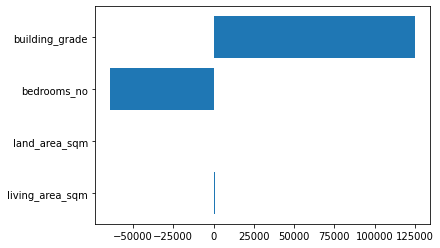

In [9]:
plt.barh(["living_area_sqm", "land_area_sqm", "bedrooms_no", "building_grade" ], res.params[1:])

### Standardized beta coefficients - standardize data first

#### Original data

In [10]:
living_area_sqm

[222, 349, 191, 297, 159, 86]

#### Standardized data
Computes the z score of each value in the sample of our variable (feature), relative to the sample mean and standard deviation.

In [11]:
from scipy import stats
stats.zscore(living_area_sqm)

array([ 0.05385651,  1.51952301, -0.3039046 ,  0.9194076 , -0.6732064 ,
       -1.51567612])

#### Apply to all variables

In [12]:
X = np.column_stack((living_area_sqm, land_area_sqm, bedrooms_no, building_grade))
X = stats.zscore(X)
X

array([[ 0.05385651, -0.35318897,  1.5109662 , -0.78086881],
       [ 1.51952301,  0.94630436, -0.13736056,  2.0302589 ],
       [-0.3039046 ,  1.65441151, -0.13736056,  0.15617376],
       [ 0.9194076 , -0.44397194,  0.68680282, -0.78086881],
       [-0.6732064 , -0.44397194, -0.13736056, -0.78086881],
       [-1.51567612, -1.35958302, -1.78568733,  0.15617376]])

#### Fit regression model

In [13]:
X = sm.add_constant(X)
y = house_prices
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     48.77
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.107
Time:                        14:00:43   Log-Likelihood:                -68.072
No. Observations:                   6   AIC:                             146.1
Df Residuals:                       1   BIC:                             145.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.564e+05   2.05e+04     27.193      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


#### Plot standardized beta coefficients

<BarContainer object of 4 artists>

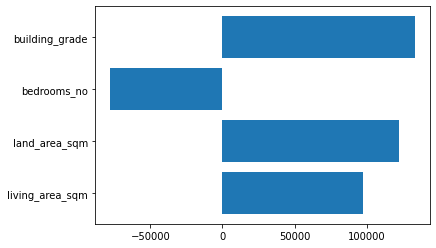

In [14]:
plt.barh(["living_area_sqm", "land_area_sqm", "bedrooms_no", "building_grade" ], res.params[1:])

## Significance

### Hypothesis testing

H0: There is no linear influence of our independent variable on our dependent variable. (Coefficient is zero.)

H1: There is a linear influence of our independent variable on our dependent variable. (Coefficient is not zero.)



### Hypotheses

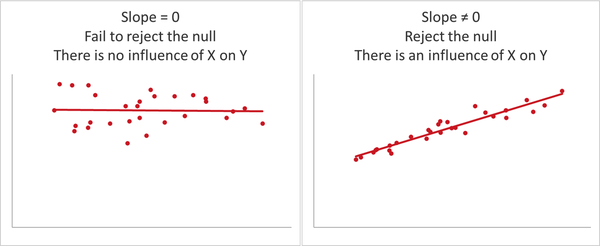

Source: Advancing into Analytics (Mount, O'Reilly)

Example for variable `living room area`:

* H0: There is no linear influence of `living room area` on `house price`
* H1: There is a linear influence of `living room area` on `house price`

In [15]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     48.77
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.107
Time:                        14:00:44   Log-Likelihood:                -68.072
No. Observations:                   6   AIC:                             146.1
Df Residuals:                       1   BIC:                             145.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.564e+05   2.05e+04     27.193      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


### t-statistic
`t = coef / std`

#### Coefficients

In [16]:
res.params

array([556428.83333333,  97434.41363147, 122256.20214095, -77865.84353033,
       133199.81015791])

#### Standard Errors

In [17]:
res.bse

array([20462.53150101, 43179.87909687, 27151.20706776, 45069.01245916,
       44241.04021682])

#### t-values (manual calculation)

In [18]:
res.params / res.bse

array([27.19257064,  2.25647722,  4.50279068, -1.72770246,  3.01077483])

#### Access t-values directly

In [19]:
res.tvalues

array([27.19257064,  2.25647722,  4.50279068, -1.72770246,  3.01077483])

#### Get p-values for each t-value

In [20]:
res.pvalues

array([0.02340099, 0.26557134, 0.13912542, 0.3340267 , 0.20414903])

Reading example: The p value of 0.266 (`Living area sqm`) is saying there is a 26.6% chance the Living area variable has no effect on the output variable and the observation happened by chance.

Possible actions:
- Collect more data
- Try less variables